# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from stock_prices_predictions.get_data import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_absolute_percentage_error

# Fetch data

define company:

In [2]:
company = "T"
days_ahead = 1

In [3]:
X_train, X_test = get_lstm_data(company)

In [4]:
X_train.shape

(3773, 1)

In [5]:
X_test.shape

(919, 1)

# Scale data

In [6]:
#try differente scalers
scaler = RobustScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [7]:
X_train_sc.shape

(3773, 1)

In [8]:
X_test_sc.shape

(919, 1)

In [9]:
X_test

,adj_close
2435450,27.816797
2435451,27.553989
2435452,27.595049
2435453,27.628361
2435454,27.903236
...,...
2436364,33.110001
2436365,33.400002
2436366,32.680000
2436367,32.490002


# Create Sequences

In [ ]:
#X_train, y_train = create_sequences(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
#X_test, y_test = create_sequences(pd.DataFrame(X_test_sc),pd.DataFrame(X_test), days_ahead)

In [ ]:
#X_train, y_train = create_sequences_scaled(pd.DataFrame(X_train_sc), days_ahead)
#X_test, y_test = create_sequences_scaled(pd.DataFrame(X_test_sc), days_ahead)

In [10]:
X_train, y_train, y_train_simple = create_sequences_scaled_plus(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
X_test, y_test, y_test_simple = create_sequences_scaled_plus(pd.DataFrame(X_test_sc), pd.DataFrame(X_test), days_ahead)

In [11]:
X_train.shape

(919, 19, 1)

In [12]:
X_test.shape

(205, 19, 1)

In [13]:
y_train.shape

(919,)

In [14]:
y_test.shape

(205,)

In [15]:
len(y_test_simple)

205

In [ ]:
#X_train

# Create model

In [16]:
model = Sequential()
#model.add(LSTM(units=72, activation='tanh', input_shape= (19, 1), return_sequences=True))
model.add(LSTM(units=18, activation='tanh', input_shape= (19, 1)))
#model.add(Dense(units=36, activation="tanh"))
#model.add(Dense(units=10, activation="tanh"))
model.add(Dense(units=1, activation="linear"))

# Fit model


In [17]:
es = EarlyStopping(patience=20, restore_best_weights=True)

#try different losses: mae, mape, mse

#rmsprop optimizer
model.compile(optimizer="nadam", loss="mse", metrics=["mae", "mape"])
#validation_split=0.2,
history_LSTM = model.fit(X_train, y_train, epochs=200, batch_size=16, workers=-1, validation_split=0.2, callbacks=[es])

Epoch 1/200
46/46 [==============================] - 2s 16ms/step - loss: 0.0486 - mae: 0.1605 - mape: 65134.8906 - val_loss: 0.3393 - val_mae: 0.5252 - val_mape: 47.9888
Epoch 2/200
46/46 [==============================] - 0s 8ms/step - loss: 0.0080 - mae: 0.0669 - mape: 101940.4375 - val_loss: 0.2495 - val_mae: 0.4443 - val_mape: 40.0438
Epoch 3/200
46/46 [==============================] - 0s 8ms/step - loss: 0.0068 - mae: 0.0615 - mape: 79329.5156 - val_loss: 0.2037 - val_mae: 0.4005 - val_mape: 36.0942
Epoch 4/200
46/46 [==============================] - 0s 8ms/step - loss: 0.0060 - mae: 0.0582 - mape: 55153.2422 - val_loss: 0.1558 - val_mae: 0.3468 - val_mape: 31.1349
Epoch 5/200
46/46 [==============================] - 0s 8ms/step - loss: 0.0054 - mae: 0.0549 - mape: 49894.2734 - val_loss: 0.1427 - val_mae: 0.3339 - val_mape: 30.1448
Epoch 6/200
46/46 [==============================] - 0s 8ms/step - loss: 0.0050 - mae: 0.0523 - mape: 25605.7695 - val_loss: 0.1123 - val_mae: 0.294

Epoch 49/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0017 - mae: 0.0300 - mape: 32200.0684 - val_loss: 0.0059 - val_mae: 0.0640 - val_mape: 6.2131
Epoch 50/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0017 - mae: 0.0297 - mape: 36679.9062 - val_loss: 0.0056 - val_mae: 0.0621 - val_mape: 6.0481
Epoch 51/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0017 - mae: 0.0294 - mape: 42349.5039 - val_loss: 0.0071 - val_mae: 0.0721 - val_mape: 7.0095
Epoch 52/200
46/46 [==============================] - 1s 17ms/step - loss: 0.0017 - mae: 0.0298 - mape: 37128.9297 - val_loss: 0.0055 - val_mae: 0.0614 - val_mape: 5.9448
Epoch 53/200
46/46 [==============================] - 1s 16ms/step - loss: 0.0017 - mae: 0.0295 - mape: 46822.5195 - val_loss: 0.0061 - val_mae: 0.0657 - val_mape: 6.3852
Epoch 54/200
46/46 [==============================] - 1s 17ms/step - loss: 0.0016 - mae: 0.0291 - mape: 29149.3750 - val_loss: 0.0057 - val_mae: 

In [18]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1885 - mae: 0.3720 - mape: 17.1189


[0.18847253918647766, 0.3720262050628662, 17.118906021118164]

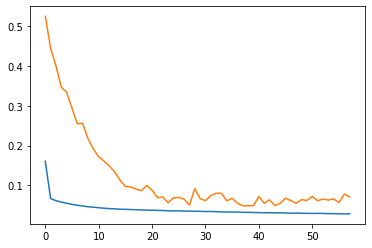

In [19]:
plt.plot(history_LSTM.history["mae"])
plt.plot(history_LSTM.history["val_mae"])

# Test Model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 18)                1440      
_________________________________________________________________
dense (Dense)                (None, 1)                 19        
Total params: 1,459
Trainable params: 1,459
Non-trainable params: 0
_________________________________________________________________


In [21]:
prediction = model.predict(X_test)

In [25]:
X_test.shape

(205, 19, 1)

In [24]:
X_test

array([[[1.2438334],
        [1.211424 ],
        [1.2164874],
        ...,
        [1.1836183],
        [1.1702647],
        [1.1990256]],

       [[1.2544931],
        [1.2442216],
        [1.2534659],
        ...,
        [1.2606565],
        [1.3407758],
        [1.3479656]],

       [[1.2370316],
        [1.2298403],
        [1.2853084],
        ...,
        [1.395216 ],
        [1.3715905],
        [1.3931608]],

       ...,

       [[2.1644228],
        [2.1237152],
        [2.0482852],
        ...,
        [2.0830579],
        [2.0806296],
        [2.141346 ]],

       [[1.9668696],
        [1.9920131],
        [2.0710342],
        ...,
        [2.0891297],
        [2.0417707],
        [2.0235558]],

       [[2.0159588],
        [2.0482852],
        [2.1093473],
        ...,
        [2.0636287],
        [2.0879157],
        [1.8329057]]], dtype=float32)

In [23]:
prediction

array([[1.1502556],
       [1.2105246],
       [1.2764347],
       [1.281037 ],
       [1.2448518],
       [1.2546166],
       [1.2471632],
       [1.1628373],
       [1.1422483],
       [1.1656203],
       [1.1378374],
       [1.1401428],
       [1.1590441],
       [1.1700495],
       [1.1638671],
       [1.2417574],
       [1.3051734],
       [1.2541842],
       [1.2434274],
       [1.2916791],
       [1.3207324],
       [1.3160876],
       [1.3277339],
       [1.3230639],
       [1.3190665],
       [1.3561329],
       [1.4023327],
       [1.3926244],
       [1.3632824],
       [1.3712883],
       [1.3539052],
       [1.3272648],
       [1.3496706],
       [1.3343872],
       [1.3204659],
       [1.3214062],
       [1.2188495],
       [1.2284222],
       [1.2057916],
       [1.2059344],
       [1.2067987],
       [1.1763195],
       [1.1497201],
       [1.1993849],
       [1.2634946],
       [1.2862898],
       [1.3109394],
       [1.3083534],
       [1.3037726],
       [1.2924379],


# Visualizing Model

In [ ]:
y_test_back = scaler.inverse_transform(y_test.reshape(-1, 1))
prediction_back = scaler.inverse_transform(prediction.reshape(-1, 1))

In [ ]:
plt.scatter(range(len(y_test_back)), y_test_simple,  color="black", label=f"Actual {company} Price")
plt.scatter(range(len(y_test_back)),prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
plt.plot(y_test_simple,  color="black", label=f"Actual {company} Price")
plt.plot(prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
mape = mean_absolute_percentage_error(y_test_back, prediction_back)
np.mean(mape)

In [ ]:
mape2 = mean_absolute_percentage_error(y_test_back, y_test_simple)
np.mean(mape2)